In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Define the quadratic function
def quadratic_function(x):
    return x**4-4*x**2-x

# Define the gradient of the quadratic function
def gradient(x):
    return 4*x**3-8*x-1

In [78]:
# intial values

xs = 2
ys = quadratic_function(xs)

In [79]:
lr = 0.2 # learning rate

In [80]:
# gradient descent
def gradient_descent(x, lr):
    x -= lr * gradient(x)
    return x

In [81]:
# gradient descent journey

def gd_journy(x_start=xs, learning_rate=lr, max_iter = 10):
    x_journey = [x_start]
    y_journey = [quadratic_function(x_start)]
    
    x = x_start
    for _ in range(max_iter):
        x = gradient_descent(x, learning_rate)
        x_journey.append(x)
        y_journey.append(quadratic_function(x))
    return x_journey, y_journey

In [82]:
beta2 = 0.9  # momentum

In [83]:
def gradient_descent_adapt(x=xs,w=0, learning_rate=lr):
        w = beta2 * w + (1 - beta2) * gradient(x)**2
        x -= learning_rate * gradient(x) / (w**0.5 +1e-5)
        return x, w

In [84]:
# gradient descent with adaptive learning rate
def gd_adapt(x_start=xs, learning_rate=lr, max_iter = 10):
    x_journey = [x_start]
    y_journey = [quadratic_function(x_start)]
    
    x = x_start
    w = 0
    for _ in range(max_iter):
        x, w = gradient_descent_adapt(x, w, learning_rate)
        x_journey.append(x)
        y_journey.append(quadratic_function(x))
    return x_journey, y_journey

In [136]:
xs = 2.3
ys = quadratic_function(xs)
max_iter = 5  # maximum iterations
lr = 0.099 # learning rate

C:\Users\hutte\AppData\Local\Temp\ipykernel_15128\2377474248.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(x_journey, y_journey, 'bo-', label='Gradient Descent Adaptive Learning Rate', color="green")


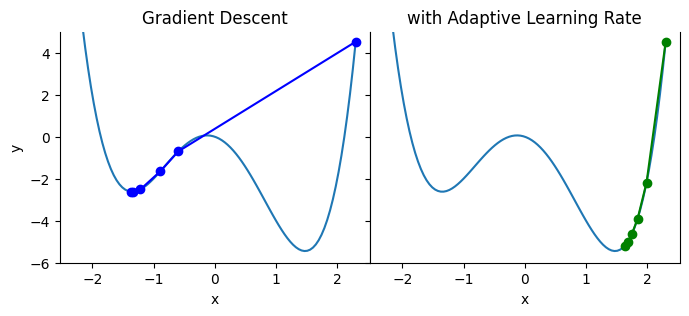

In [138]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True, frameon=False)

# Plot the quadratic function in both subplots
x = np.linspace(-2.3, 2.3, 100)
y = quadratic_function(x)
ax1.plot(x, y, label='Quadratic Function')
ax2.plot(x, y, label='Quadratic Function')

# Plot the journey of gradient descent without momentum in the first subplot
x_journey, y_journey = gd_journy(xs, lr, max_iter)
ax1.plot(x_journey, y_journey, 'bo-', label='Gradient Descent Journey')

# Plot the journey of gradient descent with momentum in the second subplot
x_journey, y_journey = gd_adapt(xs, lr, max_iter)
ax2.plot(x_journey, y_journey, 'bo-', label='Gradient Descent Adaptive Learning Rate', color="green")


# Set the labels and title for both subplots
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Gradient Descent')
ax1.spines['top'].set_visible(False)


ax2.set_xlabel('x')
ax2.set_title('with Adaptive Learning Rate')
ax2.spines['top'].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0)

# Show the plot
ax1.set_ylim(-6, 5)
ax2.set_ylim(-6, 5)


plt.show()